In [1]:
import gdal
import numpy as np

## GDAL with NAIP on Azure

In [2]:
path = 'http://naipblobs.blob.core.windows.net/naip/data/v1/2012/states/mo/mo_1m_2012/36089/m_3608901_nw_16_1_20120614.mrf'
ds = gdal.Open(path)
## printining the path

In [3]:
print(ds)

None


### This doesn't work for the path

## This does work

You need to put the ```/vsicurl/``` before the path for GDAL to recognize it as a file.

In [4]:
path = '/vsicurl/http://naipblobs.blob.core.windows.net/naip/data/v1/2012/states/mo/mo_1m_2012/36089/m_3608901_nw_16_1_20120614.mrf'
ds = gdal.Open(path)


In [5]:
print(ds)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002DAEF22BF60> >


In [6]:
desc = ds.GetDescription()
print(desc)

/vsicurl/http://naipblobs.blob.core.windows.net/naip/data/v1/2012/states/mo/mo_1m_2012/36089/m_3608901_nw_16_1_20120614.mrf


In [7]:
metadata = ds.GetMetadata()
print(metadata)

{}


In [8]:
prj = ds.GetProjection()
print(prj)

PROJCS["NAD83 / UTM zone 16N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.2572221010002,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-87],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","26916"]]


In [9]:
num_bands = ds.RasterCount
print(num_bands)

4


In [10]:
print(ds.RasterXSize)
print(ds.RasterYSize)

6383
7711


In [11]:
pixel_array = np.zeros((num_bands, ds.RasterYSize, ds.RasterXSize))

In [12]:
for band_num in range(num_bands):
    band = ds.GetRasterBand(band_num+1)
    xoff, yoff, xcount, ycount = (0, 0, ds.RasterXSize, ds.RasterYSize)
    pixel_array[band_num, :, :] = band.ReadAsArray(xoff, yoff, xcount, ycount)

In [13]:
pixel_array

array([[[ 70.,  80.,  69., ...,  75.,  66.,  75.],
        [ 72.,  77.,  76., ...,  84.,  68.,  64.],
        [ 59.,  64.,  70., ...,  82.,  70.,  59.],
        ...,
        [129., 131., 135., ..., 118., 119., 115.],
        [125., 128., 134., ..., 121., 121., 117.],
        [123., 126., 142., ..., 117., 115., 116.]],

       [[ 81.,  94.,  81., ...,  92.,  75.,  92.],
        [ 82.,  94.,  88., ..., 107.,  81.,  74.],
        [ 63.,  75.,  83., ..., 102.,  82.,  64.],
        ...,
        [126., 125., 128., ..., 118., 120., 114.],
        [122., 122., 127., ..., 121., 122., 115.],
        [121., 122., 136., ..., 117., 115., 116.]],

       [[ 81., 103.,  82., ...,  86.,  65.,  84.],
        [ 84.,  97.,  92., ..., 104.,  70.,  62.],
        [ 56.,  71.,  82., ..., 100.,  74.,  52.],
        ...,
        [ 96.,  94.,  99., ...,  93.,  94.,  89.],
        [ 93.,  95., 101., ...,  99.,  99.,  92.],
        [ 92.,  96., 113., ...,  92.,  89.,  92.]],

       [[109., 137., 126., ..., 168.,

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns

plt.style.use('fivethirtyeight')
#sns.set_context("paper")
#sns.set_context("talk")

<Figure size 1152x1152 with 0 Axes>

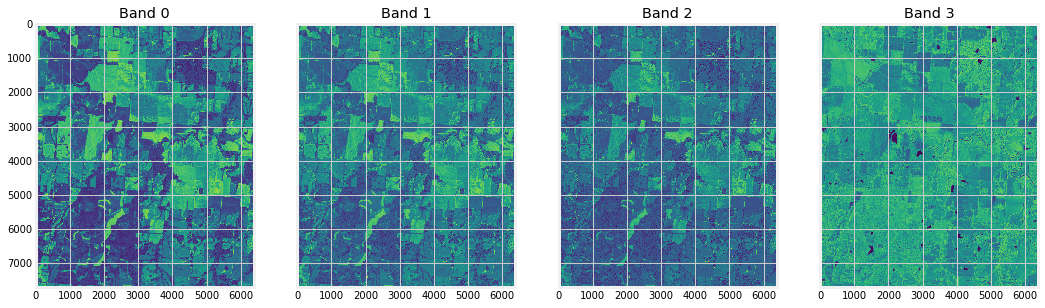

In [15]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')

fig, ax = plt.subplots(1, num_bands, sharex='col', sharey='row')
fig.set_figheight(16)
fig.set_figwidth(16)

for i in range(num_bands):
    ax[i].imshow(pixel_array[i, :, :]) 
    plt.setp(ax[i],title="Band " + str(i))

## GDAL with Landsat on Google

In [16]:
path = '/vsicurl/https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
ds = gdal.Open(path)
print(ds)
    

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002DADF98C570> >


In [17]:
desc = ds.GetDescription()
print(desc)

/vsicurl/https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF


In [18]:
metadata = ds.GetMetadata()
print(metadata)

{'AREA_OR_POINT': 'Point'}


In [19]:
prj = ds.GetProjection()
print(prj)

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32611"]]


In [20]:
num_bands = ds.RasterCount
print(num_bands)

1


### We are only looking at one band at a time...

## If we want to look at the first 4 Landsat bands

In [21]:
num_bands = 4
pixel_array = np.zeros((num_bands, 5000, 5000))
for band_num in range(num_bands):
    print("Reading band number " + str(band_num + 1) + ".")
    path = '/vsicurl/https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(band_num+1)
    ds = gdal.Open(path)
    band = ds.GetRasterBand(1)
    xoff, yoff, xcount, ycount = (0, 0, 5000, 5000)
    pixel_array[band_num, :, :] = band.ReadAsArray(xoff, yoff, xcount, ycount)
    

Reading band number 1.
Reading band number 2.
Reading band number 3.
Reading band number 4.


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns

plt.style.use('fivethirtyeight')
#sns.set_context("paper")
#sns.set_context("talk")

<Figure size 1152x1152 with 0 Axes>

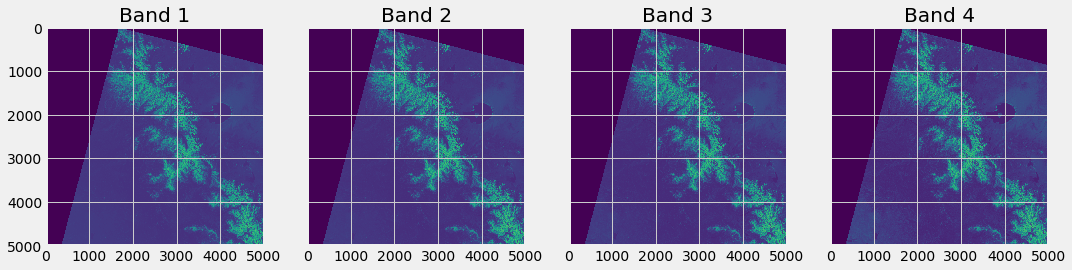

In [23]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, num_bands, sharex='col', sharey='row')
fig.set_figheight(16)
fig.set_figwidth(16)

for i in range(num_bands):
    #for j in range(4):
    ax[i].imshow(pixel_array[i, :, :])#,  "*b",label='linear') 
    
    plt.setp(ax[i],title="Band " + str(i+1))

## GDAL with Landsat on AWS

In [24]:
path = '/vsicurl/http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
ds = gdal.Open(path)
print(ds)



<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002DAF2199810> >


In [25]:
desc = ds.GetDescription()
print(desc)

/vsicurl/http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF


In [26]:
metadata = ds.GetMetadata()
print(metadata)

{'AREA_OR_POINT': 'Point'}


In [27]:
prj = ds.GetProjection()
print(prj)

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32611"]]


In [28]:
num_bands = ds.RasterCount
print(num_bands)

1


### Again, we are only looking at one band at a time...

## If we want to look at the first 4 Landsat bands

In [29]:
num_bands = 4
pixel_array = np.zeros((num_bands, 5000, 5000))
for band_num in range(num_bands):
    print('Reading band number ' + str(band_num+1) + '.')
    path = '/vsicurl/http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(band_num+1)
    ds = gdal.Open(path)
    band = ds.GetRasterBand(1)
    xoff, yoff, xcount, ycount = (0, 0, 5000, 5000)
    pixel_array[band_num, :, :] = band.ReadAsArray(xoff, yoff, xcount, ycount)
    

Reading band number 1.
Reading band number 2.
Reading band number 3.
Reading band number 4.


In [30]:
pixel_array.shape

(4, 5000, 5000)

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns

plt.style.use('fivethirtyeight')
#sns.set_context("paper")
#sns.set_context("talk")

<Figure size 1152x1152 with 0 Axes>

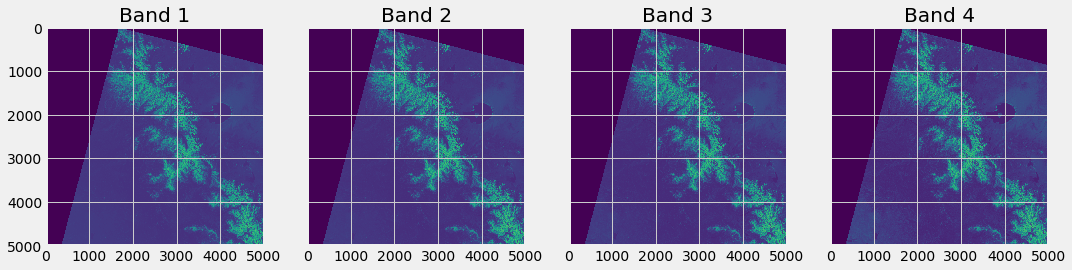

In [32]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, num_bands, sharex='col', sharey='row')
fig.set_figheight(16)
fig.set_figwidth(16)

for i in range(num_bands):
    ax[i].imshow(pixel_array[i, :, :])
    plt.setp(ax[i],title="Band " + str(i+1))